In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [337]:
data = pd.read_csv('BankChurners.csv')

In [338]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [339]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [340]:
data.shape

(10127, 23)

In [341]:
data = data.iloc[:, :21]
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [342]:
data.shape

(10127, 21)

In [343]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

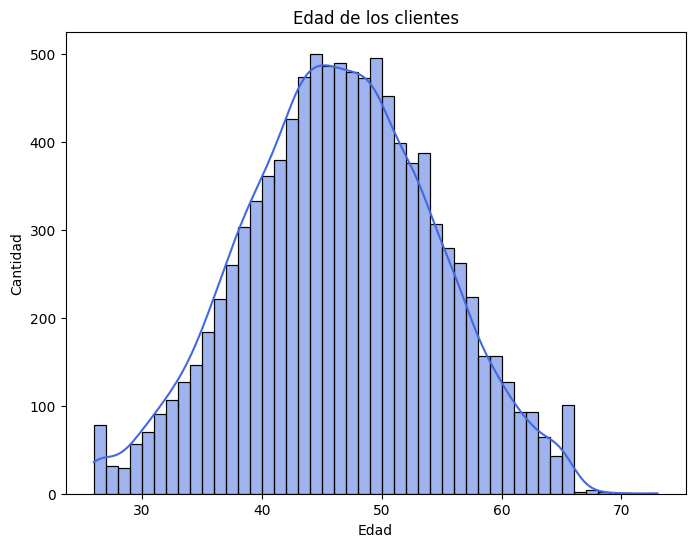

In [344]:
plt.figure(figsize=(8, 6))

sns.histplot(data["Customer_Age"],kde=True,color="royalblue")
plt.title('Edad de los clientes')
plt.xlabel('Edad')
plt.ylabel('Cantidad')

plt.show()

In [345]:
counts = data.groupby(['Gender', 'Attrition_Flag']).size().reset_index(name='Frecuencia')
counts

,Gender,Attrition_Flag,Frecuencia
0,F,Attrited Customer,930
1,F,Existing Customer,4428
2,M,Attrited Customer,697
3,M,Existing Customer,4072


<Figure size 1600x1000 with 0 Axes>

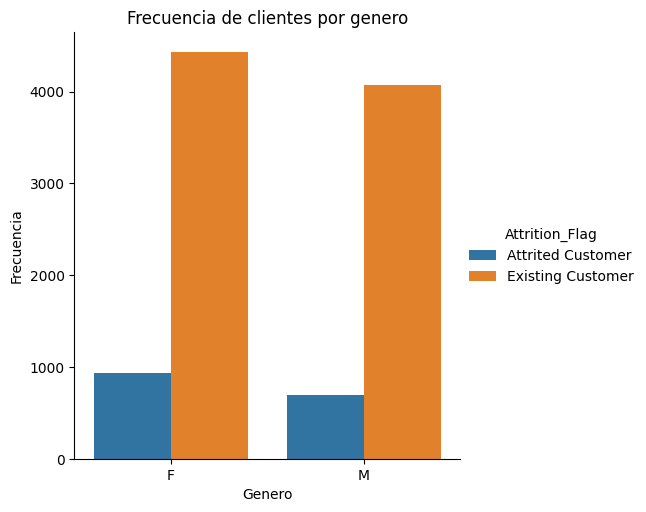

In [346]:
plt.figure(figsize=(16, 10))
sns.catplot(x='Gender', y='Frecuencia', hue='Attrition_Flag', data=counts, kind='bar')
plt.title('Frecuencia de clientes por genero')
plt.xlabel('Genero')
plt.ylabel('Frecuencia')
plt.show()

In [347]:
counts = data.groupby(['Education_Level', 'Attrition_Flag']).size().reset_index(name='Frequency')
counts

,Education_Level,Attrition_Flag,Frequency
0,College,Attrited Customer,154
1,College,Existing Customer,859
2,Doctorate,Attrited Customer,95
3,Doctorate,Existing Customer,356
4,Graduate,Attrited Customer,487
5,Graduate,Existing Customer,2641
6,High School,Attrited Customer,306
7,High School,Existing Customer,1707
8,Post-Graduate,Attrited Customer,92
9,Post-Graduate,Existing Customer,424


<Figure size 4000x1000 with 0 Axes>

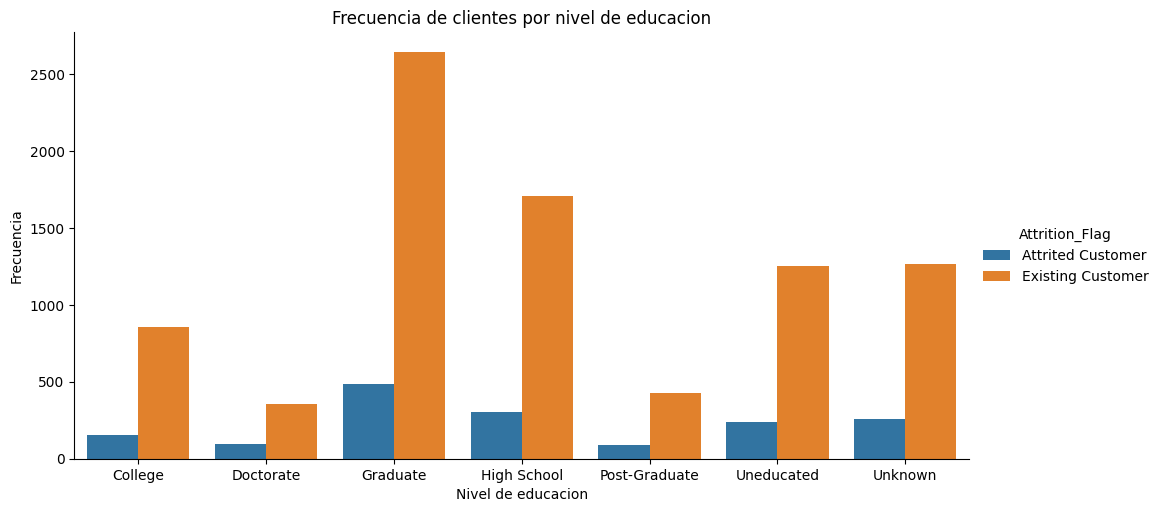

In [348]:
plt.figure(figsize=(40, 10))
sns.catplot(x='Education_Level', y='Frequency', hue='Attrition_Flag', data=counts, kind='bar', aspect=2)
plt.title('Frecuencia de clientes por nivel de educacion')
plt.xlabel('Nivel de educacion')
plt.ylabel('Frecuencia')
plt.show()

In [349]:
counts = data.groupby(['Income_Category', 'Attrition_Flag']).size().reset_index(name='Frequency')
counts

,Income_Category,Attrition_Flag,Frequency
0,$120K +,Attrited Customer,126
1,$120K +,Existing Customer,601
2,$40K - $60K,Attrited Customer,271
3,$40K - $60K,Existing Customer,1519
4,$60K - $80K,Attrited Customer,189
5,$60K - $80K,Existing Customer,1213
6,$80K - $120K,Attrited Customer,242
7,$80K - $120K,Existing Customer,1293
8,Less than $40K,Attrited Customer,612
9,Less than $40K,Existing Customer,2949


<Figure size 1000x800 with 0 Axes>

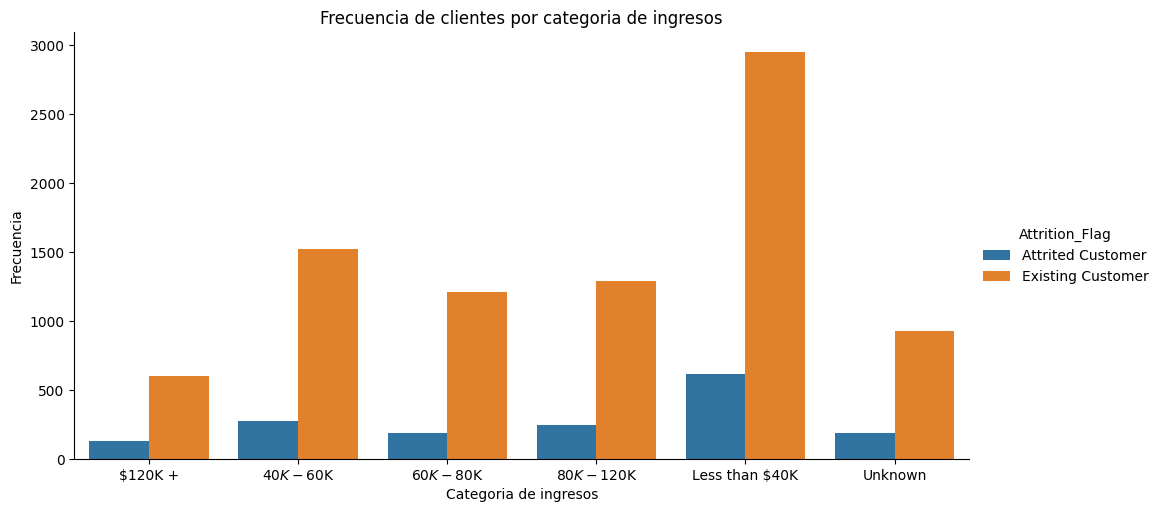

In [350]:
plt.figure(figsize=(10, 8))
sns.catplot(x='Income_Category', y='Frequency', hue='Attrition_Flag', data=counts, kind='bar', aspect=2)
plt.title('Frecuencia de clientes por categoria de ingresos')
plt.xlabel('Categoria de ingresos')
plt.ylabel('Frecuencia')
plt.show()


# Definiendo el target

In [351]:
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer':1, 'Attrited Customer':0})
data['Attrition_Flag'].head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition_Flag, dtype: int64

# HEATMAP

In [352]:
numeric_cols = data.select_dtypes(include=['number']).columns
df_numeric = data[numeric_cols]
correlation_matrix = df_numeric.corr()

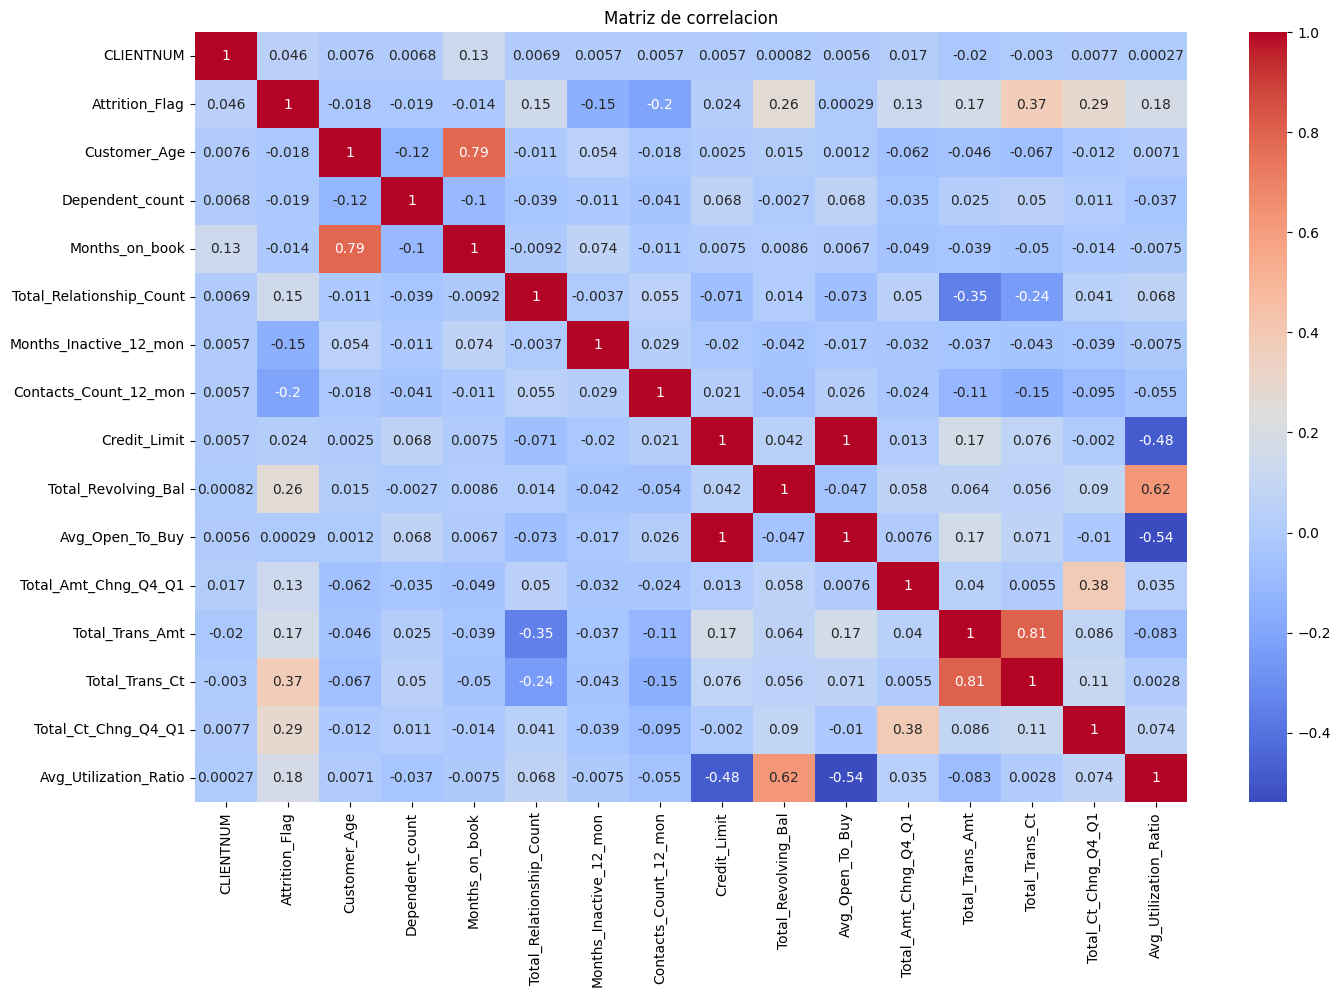

In [353]:
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlacion')
plt.show()

# Procesando la data

In [354]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [355]:
X, Y = data.drop(['Attrition_Flag'], axis=1), data['Attrition_Flag']

In [356]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=.2,random_state=42, stratify=Y)
X_train_orig = X_train
X_test_orig = X_test

In [357]:
# Convertimos las variables categoricas en numericas
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = label_encoder.fit_transform(X_train[col])
        X_test[col] = label_encoder.fit_transform(X_test[col])

In [358]:

# Normalizamos la data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MODELANDO

In [359]:
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

In [360]:
predictions = model.predict(X_test)

In [361]:
from sklearn.metrics import confusion_matrix

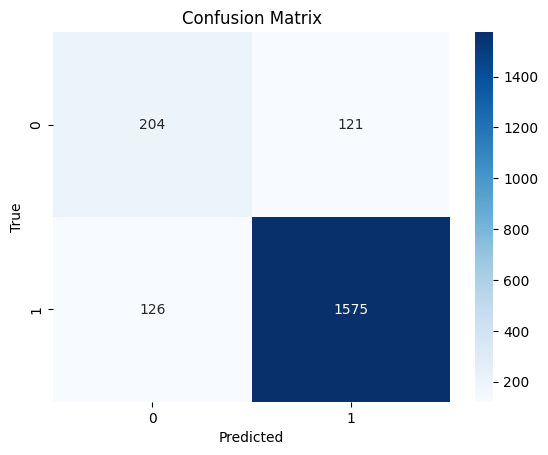

In [362]:
sns.heatmap(confusion_matrix(Y_test, predictions)
, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

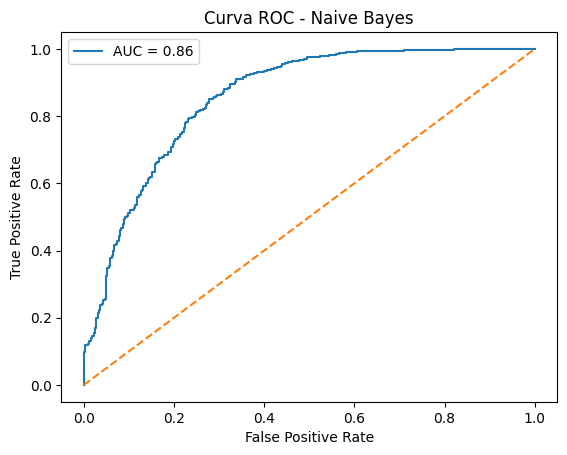

In [363]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtiene las probabilidades de la clase positiva (1)
y_prob = model.predict_proba(X_test)[:, 1]
# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
# Calcula el AUC
auc_score = roc_auc_score(Y_test, y_prob)

# Grafica la curva ROC
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')  # Línea diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Naive Bayes')
plt.legend()
plt.show()

In [364]:
dataf = pd.concat([pd.DataFrame(X_test_orig),pd.DataFrame(Y_test),pd.DataFrame(predictions),pd.DataFrame(y_prob)],axis=1)

In [365]:
dataf.isnull().sum()
dataf = dataf.dropna()

In [366]:
dataf = dataf.drop(['Attrition_Flag'], axis=1)
dataf.head(10)

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,0,0
914,787800108.0,55.0,1.0,2.0,0.0,1.0,3.0,0.0,45.0,5.0,...,2929.0,2431.0,498.0,1.632,1903.0,39.0,0.625,0.830,1.0,0.949596
1640,789187908.0,56.0,1.0,2.0,5.0,1.0,3.0,0.0,45.0,4.0,...,11102.0,1946.0,9156.0,0.625,1448.0,36.0,1.000,0.175,1.0,0.996337
1244,719182308.0,38.0,0.0,2.0,3.0,2.0,4.0,0.0,27.0,6.0,...,2096.0,1567.0,529.0,0.778,1559.0,49.0,1.042,0.748,1.0,0.998618
600,816596583.0,45.0,1.0,2.0,1.0,1.0,3.0,0.0,40.0,6.0,...,11710.0,693.0,11017.0,0.914,1749.0,50.0,0.429,0.059,1.0,0.681004
1465,771544533.0,42.0,0.0,5.0,3.0,1.0,5.0,0.0,30.0,3.0,...,3578.0,0.0,3578.0,0.759,1015.0,36.0,0.440,0.000,1.0,0.987928
394,712459233.0,59.0,0.0,1.0,4.0,1.0,1.0,0.0,46.0,5.0,...,1944.0,1346.0,598.0,1.052,1960.0,57.0,0.727,0.692,1.0,0.990967
1100,778971408.0,36.0,1.0,4.0,1.0,1.0,2.0,0.0,17.0,5.0,...,2803.0,1848.0,955.0,0.614,1968.0,64.0,0.524,0.659,1.0,1.000000
740,721517208.0,41.0,1.0,4.0,6.0,1.0,4.0,0.0,30.0,4.0,...,2450.0,1967.0,483.0,0.589,1263.0,29.0,0.611,0.803,1.0,0.999103
1998,803587533.0,33.0,1.0,1.0,5.0,2.0,2.0,0.0,28.0,6.0,...,2618.0,1812.0,806.0,0.706,3319.0,86.0,0.911,0.692,1.0,0.607208
176,716264358.0,53.0,1.0,3.0,5.0,1.0,3.0,0.0,42.0,2.0,...,26792.0,1836.0,24956.0,1.432,2398.0,47.0,0.880,0.069,1.0,0.957937


In [367]:
dataf.columns

Index([               'CLIENTNUM',             'Customer_Age',
                         'Gender',          'Dependent_count',
                'Education_Level',           'Marital_Status',
                'Income_Category',            'Card_Category',
                 'Months_on_book', 'Total_Relationship_Count',
         'Months_Inactive_12_mon',    'Contacts_Count_12_mon',
                   'Credit_Limit',      'Total_Revolving_Bal',
                'Avg_Open_To_Buy',     'Total_Amt_Chng_Q4_Q1',
                'Total_Trans_Amt',           'Total_Trans_Ct',
            'Total_Ct_Chng_Q4_Q1',    'Avg_Utilization_Ratio',
                                0,                          0],
      dtype='object')

In [368]:
dataf.columns = ['CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Prediccion', 'Probabilidad']

In [369]:
quantiles = dataf['Probabilidad'].quantile(q=[0.20,0.40,0.60,0.80])
quantiles

0.2    0.566423
0.4    0.909854
0.6    0.986948
0.8    0.998916
Name: Probabilidad, dtype: float64

In [370]:
dataf.to_csv('dataf.csv', index = False)

# IMPLEMENTACION

In [371]:
import pickle

In [372]:
Pkl_Filename = "classifier.pkl"

with open (Pkl_Filename, 'wb') as file:
    pickle.dump(model, file)

In [374]:
dataf['score'] = pd.cut(dataf['Probabilidad'], bins=[0,0.2,0.4,0.6,0.8,1], labels=['Muy bajo','Bajo','Medio','Alto','Muy alto'])
dataf.head(5)


,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Prediccion,Probabilidad,score
914,787800108.0,55.0,1.0,2.0,0.0,1.0,3.0,0.0,45.0,5.0,...,2431.0,498.0,1.632,1903.0,39.0,0.625,0.830,1.0,0.949596,Muy alto
1640,789187908.0,56.0,1.0,2.0,5.0,1.0,3.0,0.0,45.0,4.0,...,1946.0,9156.0,0.625,1448.0,36.0,1.000,0.175,1.0,0.996337,Muy alto
1244,719182308.0,38.0,0.0,2.0,3.0,2.0,4.0,0.0,27.0,6.0,...,1567.0,529.0,0.778,1559.0,49.0,1.042,0.748,1.0,0.998618,Muy alto
600,816596583.0,45.0,1.0,2.0,1.0,1.0,3.0,0.0,40.0,6.0,...,693.0,11017.0,0.914,1749.0,50.0,0.429,0.059,1.0,0.681004,Alto
1465,771544533.0,42.0,0.0,5.0,3.0,1.0,5.0,0.0,30.0,3.0,...,0.0,3578.0,0.759,1015.0,36.0,0.440,0.000,1.0,0.987928,Muy alto


In [375]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 914 to 665
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 400 non-null    float64 
 1   Customer_Age              400 non-null    float64 
 2   Gender                    400 non-null    float64 
 3   Dependent_count           400 non-null    float64 
 4   Education_Level           400 non-null    float64 
 5   Marital_Status            400 non-null    float64 
 6   Income_Category           400 non-null    float64 
 7   Card_Category             400 non-null    float64 
 8   Months_on_book            400 non-null    float64 
 9   Total_Relationship_Count  400 non-null    float64 
 10  Months_Inactive_12_mon    400 non-null    float64 
 11  Contacts_Count_12_mon     400 non-null    float64 
 12  Credit_Limit              400 non-null    float64 
 13  Total_Revolving_Bal       400 non-null    float64 
 1